# FREQUENCY POLYGON — All Variants (Complete Python Code)

A frequency polygon is simply a line plot of binned frequencies, usually drawn over a histogram.

We will use:

Matplotlib

Seaborn

Synthetic + real datasets

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Synthetic dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=12, size=500)


## Basic Frequency Polygon

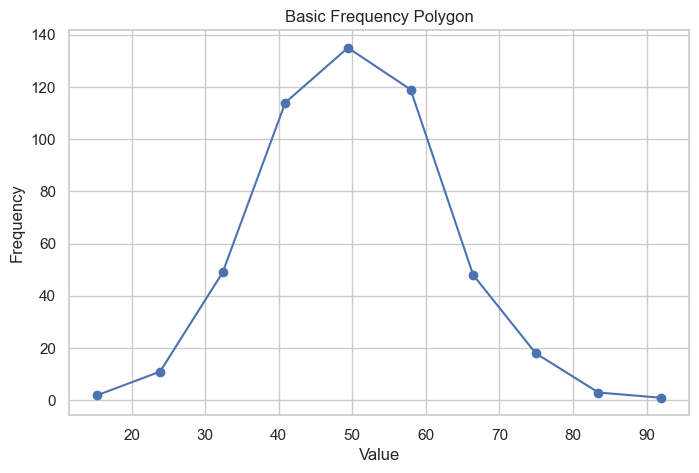

In [3]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(data, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, counts, marker="o")
plt.title("Basic Frequency Polygon")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


## Frequency Polygon Overlaid on Histogram

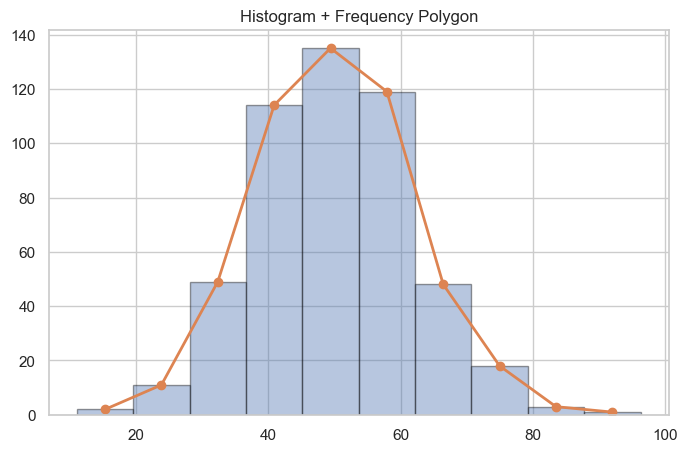

In [4]:
plt.figure(figsize=(8,5))

plt.hist(data, bins=10, alpha=0.4, edgecolor='black')

counts, bin_edges = np.histogram(data, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.plot(bin_centers, counts, marker="o", linewidth=2)
plt.title("Histogram + Frequency Polygon")
plt.show()


In [ ]:
## Multiple Groups on One Frequency Polygon

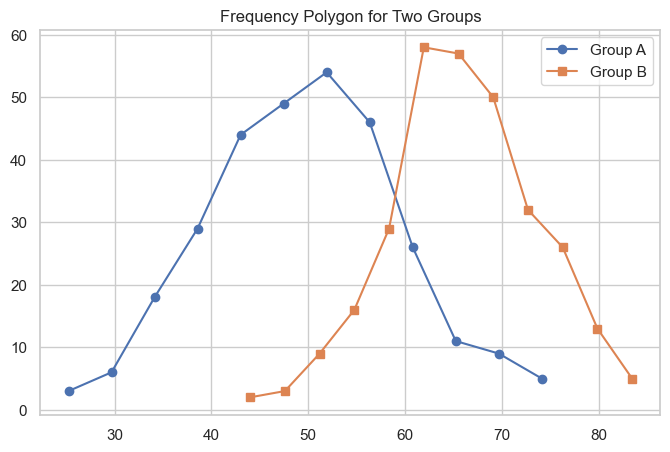

In [6]:
group_A = np.random.normal(50, 10, 300)
group_B = np.random.normal(65, 8, 300)

plt.figure(figsize=(8,5))

# Group A
counts_A, bins_A = np.histogram(group_A, bins=12)
centers_A = (bins_A[:-1] + bins_A[1:]) / 2
plt.plot(centers_A, counts_A, marker="o", label="Group A")

# Group B
counts_B, bins_B = np.histogram(group_B, bins=12)
centers_B = (bins_B[:-1] + bins_B[1:]) / 2
plt.plot(centers_B, counts_B, marker="s", label="Group B")

plt.legend()
plt.title("Frequency Polygon for Two Groups")
plt.show()


## Smoothed Frequency Polygon (Using KDE Approximation)

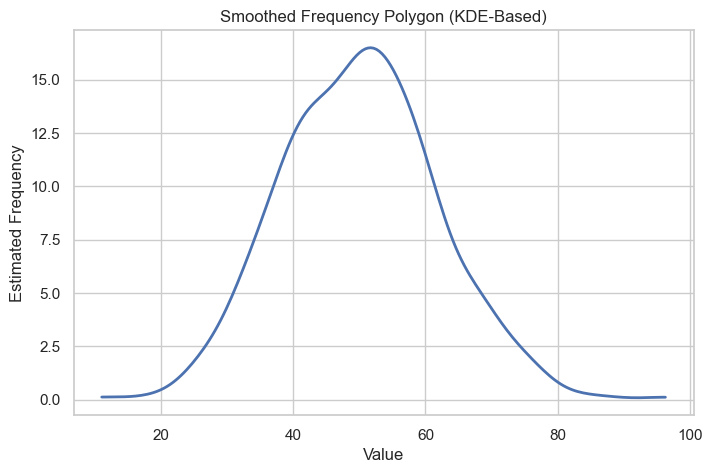

In [7]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(8,5))

kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 200)
y_vals = kde(x_vals) * len(data)  # scale to frequency

plt.plot(x_vals, y_vals, linewidth=2)
plt.title("Smoothed Frequency Polygon (KDE-Based)")
plt.xlabel("Value")
plt.ylabel("Estimated Frequency")
plt.show()


## Frequency Polygon Using Pandas cut()

(Useful for teaching binning logic)

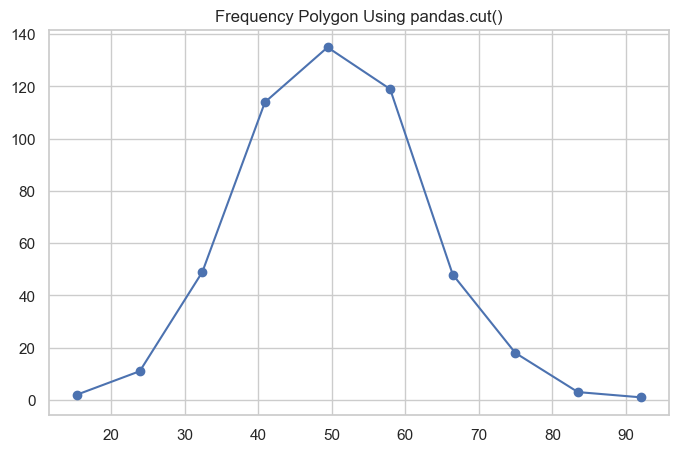

In [8]:
plt.figure(figsize=(8,5))

df = pd.DataFrame({"value": data})

df["bins"] = pd.cut(df["value"], bins=10)
freq = df["bins"].value_counts().sort_index()

bin_centers = [interval.mid for interval in freq.index]

plt.plot(bin_centers, freq.values, marker="o")
plt.title("Frequency Polygon Using pandas.cut()")
plt.show()


## Frequency Polygon with Real Dataset (Tips — Seaborn)

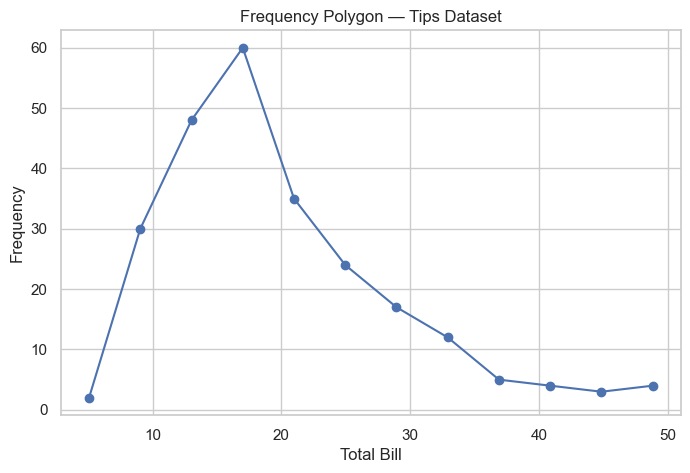

In [9]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(8,5))

counts, edges = np.histogram(tips["total_bill"], bins=12)
centers = (edges[:-1] + edges[1:]) / 2

plt.plot(centers, counts, marker='o')
plt.title("Frequency Polygon — Tips Dataset")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()


## Advanced Styling (line style, color, markers)

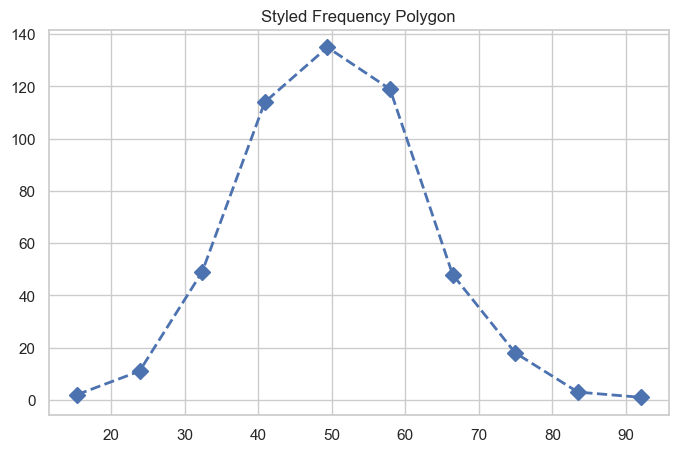

In [10]:
plt.figure(figsize=(8,5))

counts, bins = np.histogram(data, bins=10)
centers = (bins[:-1] + bins[1:]) / 2

plt.plot(centers, counts, 
         marker='D',
         linestyle='--',
         linewidth=2,
         markersize=8)

plt.title("Styled Frequency Polygon")
plt.show()
